# modelos lineales clasificacion

In [3]:
# Import data and modules
import numpy as np
from sklearn import datasets
from sklearn import preprocessing

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True)

In [48]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [49]:
print('Existen {} muestras en el conjunto de entrenamiento y {} muestras en el conjunto de test'.format(
X_train.shape[0], X_test.shape[0]))

Existen 105 muestras en el conjunto de entrenamiento y 45 muestras en el conjunto de test


In [50]:
for z in {c:np.sum(y_train==c) for c in np.unique(y_train)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 34 muestras de la clase 0
Existen 32 muestras de la clase 1
Existen 39 muestras de la clase 2


In [51]:
for z in {c:np.sum(y_test==c) for c in np.unique(y_test)}.items():
    print('En test, existen {} muestras de la clase {}'.format(z[1],z[0]))

En test, existen 16 muestras de la clase 0
En test, existen 18 muestras de la clase 1
En test, existen 11 muestras de la clase 2


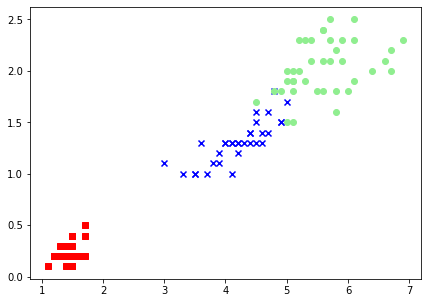

In [52]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X_test[:, 0].min() , X_test[:, 0].max()
    y_min, y_max = X_test[:, 1].min() , X_test[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # Plot also the training points
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    marker=markers[idx], label=cl,color=colors[idx])

        # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)
        
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
plt.figure(figsize=(7,5))
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1], marker=markers[idx], label=cl,color=colors[idx])

Ahora ajustamos un modelo lineal de clasificacion con regularizacion (c es el inverso del parametro de regularizacion)

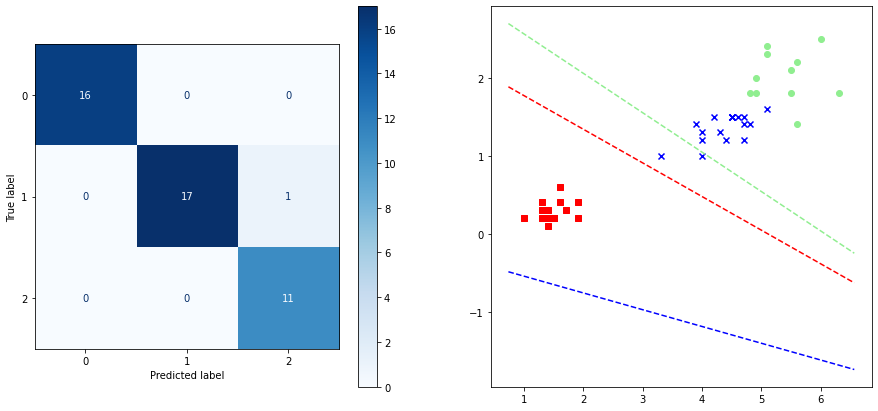

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_auc_score
    
clf_l2 = LogisticRegression(penalty='none',multi_class='multinomial').fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
plot_confusion_matrix(clf_l2, X_test, y_test,cmap=plt.cm.Blues,ax=ax1)
plot_decision_boundary(clf_l2)

In [69]:
import numpy as np

def softmax(w,b,x):
  prob=np.exp(np.dot(w,x)+b)
  return prob/np.sum(prob)

for i in range(10):
  W=clf_l2.coef_
  b=clf_l2.intercept_
  y_hat=np.argmax(softmax(W,b,X_test[i]))
  print('Ejemplo {2}, Etiqueta correcta {0}, Etiqueta predicha {1}'.format(y_test[i],y_hat,i))

Ejemplo 0, Etiqueta correcta 2, Etiqueta predicha 2
Ejemplo 1, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 2, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 3, Etiqueta correcta 2, Etiqueta predicha 2
Ejemplo 4, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 5, Etiqueta correcta 2, Etiqueta predicha 2
Ejemplo 6, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 7, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 8, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 9, Etiqueta correcta 1, Etiqueta predicha 1


In [66]:
np.exp(np.dot(W,X_test[1]))

array([6.00936643e-21, 3.27776088e+03, 5.07684666e+16])

In [57]:
y_hat=clf_l2.predict(X_test)

In [68]:
clf_l2.intercept_

array([ 37.5847107 ,   1.44060045, -39.02531115])

In [59]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

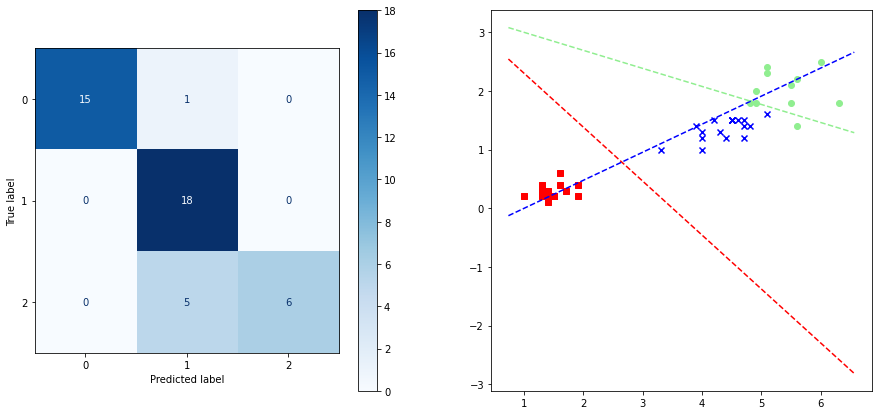

In [71]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(loss="log", alpha=0.0001,penalty='l2',
                        max_iter=1e5,learning_rate='optimal',eta0=1e-5).fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
plot_confusion_matrix(clf_sgd, X_test, y_test,cmap=plt.cm.Blues,ax=ax1)
plot_decision_boundary(clf_sgd)

In [72]:
for i in range(10):
  W=clf_sgd.coef_
  b=clf_sgd.intercept_
  y_hat=np.argmax(softmax(W,b,X_test[i]))
  print('Ejemplo {2}, Etiqueta correcta {0}, Etiqueta predicha {1}'.format(y_test[i],y_hat,i))

Ejemplo 0, Etiqueta correcta 2, Etiqueta predicha 2
Ejemplo 1, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 2, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 3, Etiqueta correcta 2, Etiqueta predicha 1
Ejemplo 4, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 5, Etiqueta correcta 2, Etiqueta predicha 2
Ejemplo 6, Etiqueta correcta 0, Etiqueta predicha 0
Ejemplo 7, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 8, Etiqueta correcta 1, Etiqueta predicha 1
Ejemplo 9, Etiqueta correcta 1, Etiqueta predicha 1


In [73]:
from sklearn.metrics import classification_report

y_pred=clf_sgd.predict_proba(X_test)

print(classification_report(y_test, y_pred.argmax(axis=1)))

print('SGD AUC score :',roc_auc_score(y_test, y_pred,multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.75      1.00      0.86        18
           2       1.00      0.55      0.71        11

    accuracy                           0.87        45
   macro avg       0.92      0.83      0.84        45
weighted avg       0.90      0.87      0.86        45

SGD AUC score : 0.9949935080654034


In [74]:
y_pred=clf_l2.predict_proba(X_test)

print(classification_report(y_test, y_pred.argmax(axis=1)))

print('L2 AUC score :',roc_auc_score(y_test, y_pred,multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

L2 AUC score : 1.0


In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)

X_poly=poly.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True)

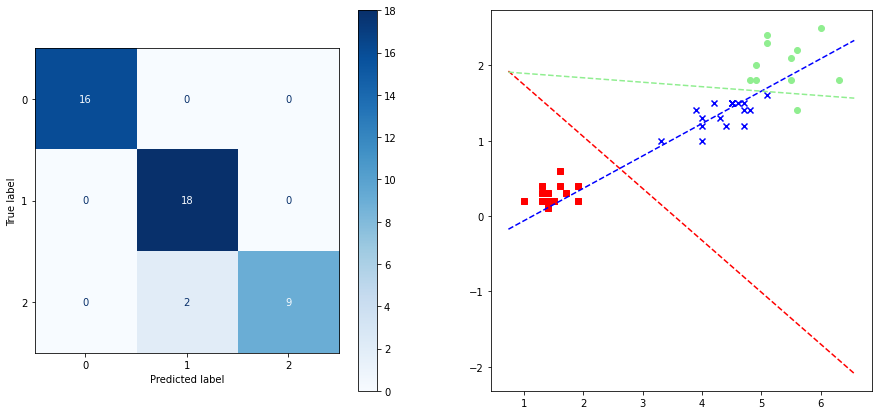

In [87]:
clf_sgd = SGDClassifier(loss="log", alpha=0.001,penalty='l1',
                        max_iter=1e5,learning_rate='optimal',eta0=1e-5).fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
plot_confusion_matrix(clf_sgd, X_test, y_test,cmap=plt.cm.Blues,ax=ax1)
plot_decision_boundary(clf_sgd)

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir la supervivencia de un paciente infectado con COVID usando datos epidemiologicos (Datos obtenidos desde [1]).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering y regularizacion.

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7306186/#!po=54.1667

In [88]:
import pandas as pd

patient_info=pd.read_csv('https://github.com/sherna90/mineria_datos/raw/master/data/datasets_527325_1332417_PatientInfo.csv')

In [89]:
patient_info.head()


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [90]:
patient_info.dtypes

patient_id             int64
sex                   object
age                   object
country               object
province              object
city                  object
infection_case        object
infected_by           object
contact_number        object
symptom_onset_date    object
confirmed_date        object
released_date         object
deceased_date         object
state                 object
dtype: object

In [91]:
patient_info['confirmed_date']=pd.to_datetime(patient_info['confirmed_date'],format='%Y/%m/%d')
patient_info['released_date']=pd.to_datetime(patient_info['released_date'],format='%Y/%m/%d')
patient_info['deceased_date']=pd.to_datetime(patient_info['deceased_date'],format='%Y/%m/%d')

patient_info['sex'] = patient_info['sex'].astype('category')
patient_info['age'] = patient_info['age'].astype('category')
patient_info['infection_case'] = patient_info['infection_case'].astype('category')

In [92]:
patient_info.drop(columns=['country','province','city','infected_by','contact_number','symptom_onset_date'],inplace=True)

In [93]:
patient_info['state'] = patient_info['state'].astype('category')

In [94]:
patient_info.dtypes

patient_id                 int64
sex                     category
age                     category
infection_case          category
confirmed_date    datetime64[ns]
released_date     datetime64[ns]
deceased_date     datetime64[ns]
state                   category
dtype: object

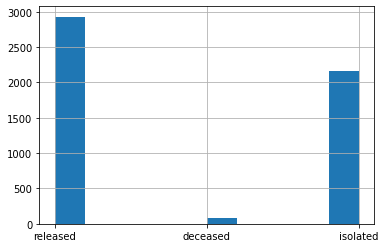

In [95]:
import matplotlib.pyplot as plt

patient_info['state'].hist()

In [96]:
data=patient_info.loc[(patient_info['state']=='released') | (patient_info['state']=='deceased')]

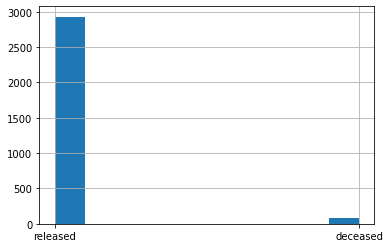

In [97]:
data['state'].hist()

In [98]:
days_released=data.loc[data['state']=='released']['released_date']-data.loc[data['state']=='released']['confirmed_date']

In [99]:
days_deceased=data.loc[data['state']=='deceased']['deceased_date']-data.loc[data['state']=='deceased']['confirmed_date']

In [100]:
data.tail()

,patient_id,sex,age,infection_case,confirmed_date,released_date,deceased_date,state
5157,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,NaT,released
5158,7000000013,female,10s,overseas inflow,2020-04-14,2020-04-26,NaT,released
5159,7000000014,female,30s,Itaewon Clubs,2020-05-09,2020-06-12,NaT,released
5160,7000000015,female,30s,overseas inflow,2020-05-30,2020-06-13,NaT,released
5161,7000000016,NaN,NaN,overseas inflow,2020-06-16,2020-06-24,NaT,released


In [115]:
cols=['sex','age','infection_case']
X=data[[x for x in cols]]

In [116]:
X.isna().sum()

sex               418
age               434
infection_case    719
dtype: int64

In [124]:
pd.isna(X)

,sex,age,infection_case
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5157,False,False,False
5158,False,False,False
5159,False,False,False
5160,False,False,False


In [117]:
y=data['state'].values

In [112]:
y

['released', 'released', 'released', 'released', 'released', ..., 'released', 'released', 'released', 'released', 'released']
Length: 3007
Categories (2, object): ['deceased', 'released']

In [125]:
X=pd.get_dummies(X)

In [136]:
X.drop(columns=['sex_male','age_0s','infection_case_overseas inflow'],inplace=True)

In [105]:
y.remove_unused_categories(inplace=True)

In [ ]:
 from sklearn.preprocessing import OneHotEncoder
 enc = OneHotEncoder(handle_unknown='ignore')
 X_trans= enc.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [138]:
for z in {c:np.sum(y_train==c) for c in np.unique(y_train)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 52 muestras de la clase deceased
Existen 2052 muestras de la clase released


In [139]:
for z in {c:np.sum(y_test==c) for c in np.unique(y_test)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 26 muestras de la clase deceased
Existen 877 muestras de la clase released


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_auc_score


clf = LogisticRegression(penalty='l2',C=0.1,solver='liblinear',class_weight='balanced').fit(X_train, y_train)

In [141]:
y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    deceased       0.20      0.81      0.32        26
    released       0.99      0.90      0.95       877

    accuracy                           0.90       903
   macro avg       0.59      0.85      0.63       903
weighted avg       0.97      0.90      0.93       903



In [142]:
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [143]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [145]:
for z in {c:np.sum(y_train==c) for c in np.unique(y_train)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 2037 muestras de la clase deceased
Existen 2063 muestras de la clase released


In [146]:
clf = LogisticRegression(penalty='l2',C=0.1,solver='liblinear',class_weight='balanced').fit(X_train, y_train)

In [147]:
y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    deceased       0.82      0.92      0.87       892
    released       0.91      0.80      0.85       866

    accuracy                           0.86      1758
   macro avg       0.87      0.86      0.86      1758
weighted avg       0.87      0.86      0.86      1758

